# Download Dataset creditcard.csv

Dataset Source : https://paperswithcode.com/dataset/kaggle-credit-card-fraud-dataset

In [1]:
!pip install gdown

In [2]:
shareable_link = 'https://drive.google.com/file/d/1DKFbb_QCN18WQLPsR7eqHcrpKgaJTF1z/view?usp=sharing'

# Extract the file ID from the link
file_id = shareable_link.split('/')[-2]

In [3]:
import pandas as pd

download_link = f'https://drive.google.com/uc?id={file_id}'
output_file = 'creditcard.csv'

# Download the file using gdown
!gdown {download_link} -O {output_file}


df = pd.read_csv(output_file)
df

Downloading...
From: https://drive.google.com/uc?id=1DKFbb_QCN18WQLPsR7eqHcrpKgaJTF1z
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 76.2MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Imbalanced Data Analysis

0    284315
1       492
Name: Class, dtype: int64


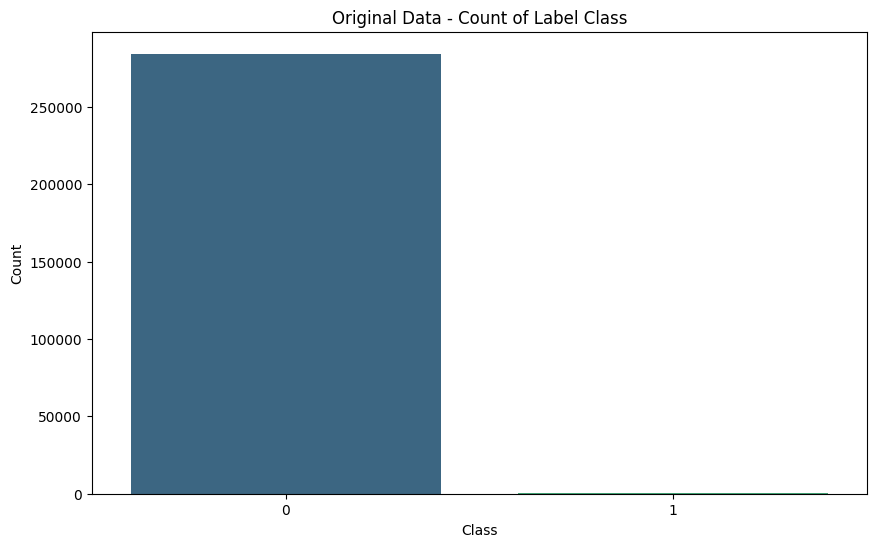

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each feature
feature_counts = pd.Series(df['Class']).value_counts()
print(feature_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Original Data - Count of Label Class')

plt.show()

## Handling Imbalanced Dataset using SMOTE

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


X = df.drop('Class', axis=1)
y = df['Class']

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X, y)
y_resampled = pd.DataFrame(y_resampled, columns=['Class'])

# Concatenate horizontally
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [6]:
y_resampled.value_counts()

Class
0        56862
1        28431
dtype: int64

0    56862
1    28431
Name: Class, dtype: int64


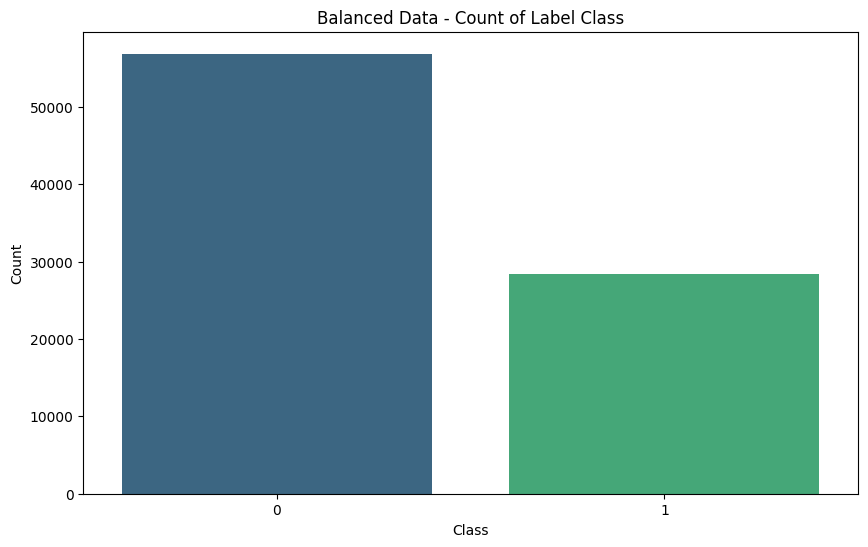

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each feature
feature_counts = pd.Series(balanced_df['Class']).value_counts()
print(feature_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Data - Count of Label Class')

plt.show()

# Correlation Analysis of Imbalanced Dataset

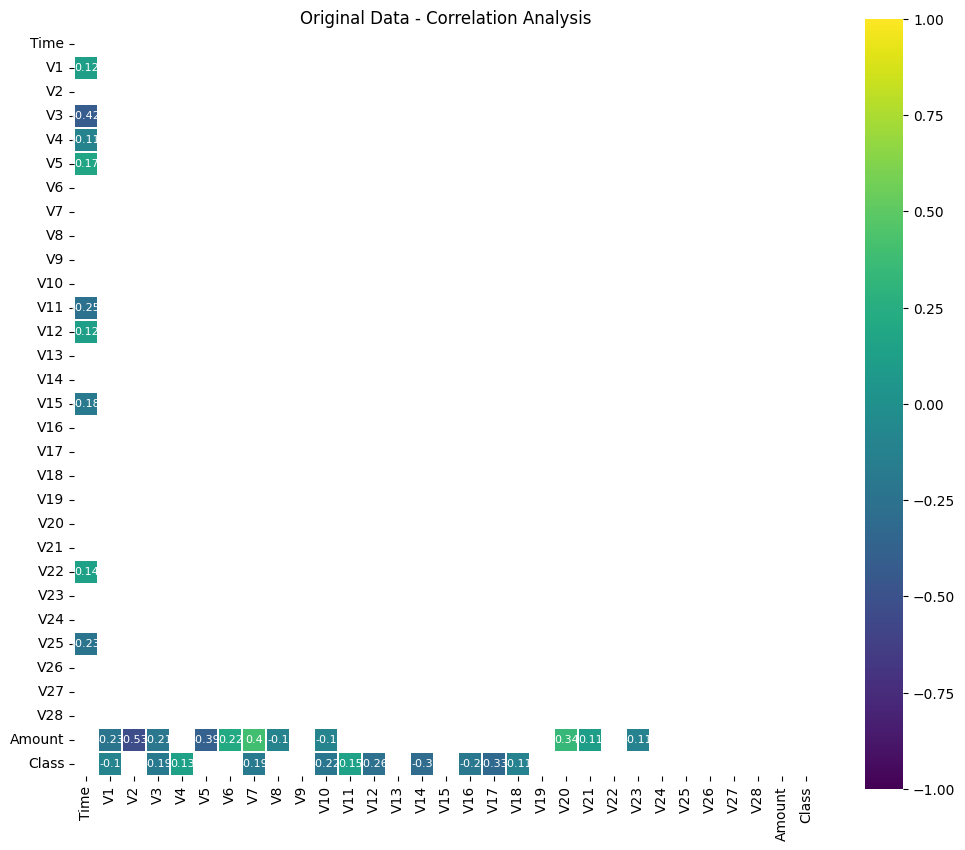

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming df is your DataFrame
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
plt.title('Original Data - Correlation Analysis')
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, mask=mask)

plt.show()

# Correlation Analysis of Balanced Dataset

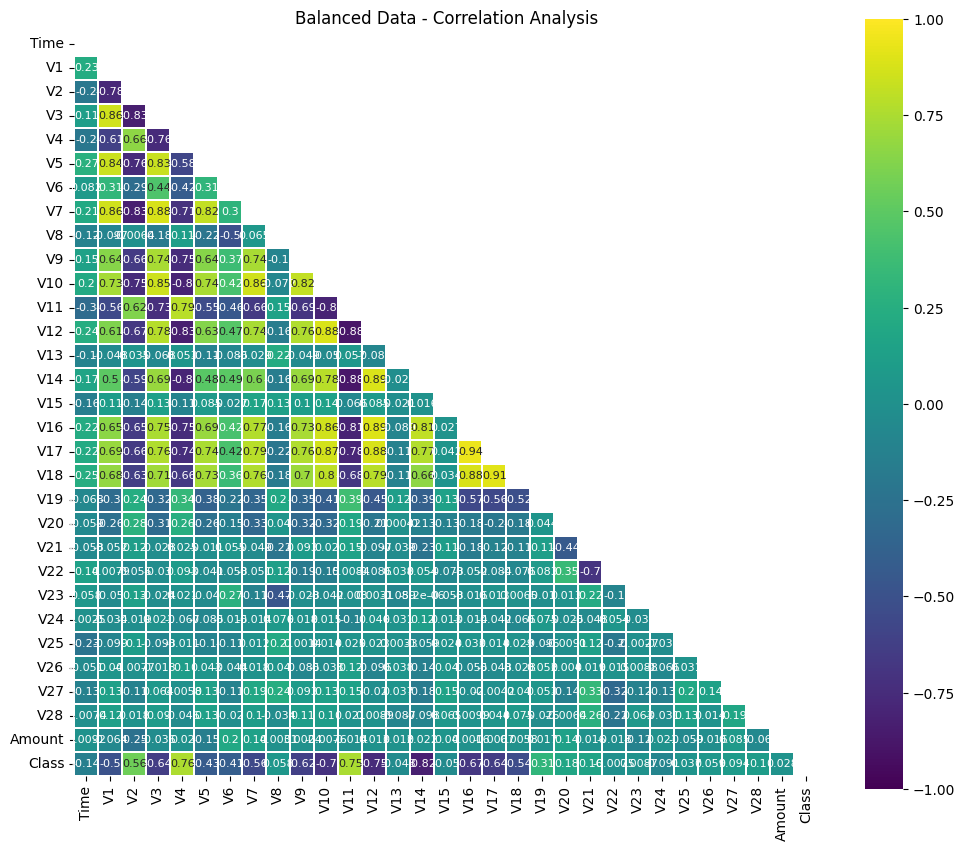

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming df is your DataFrame
corr = balanced_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
plt.title('Balanced Data - Correlation Analysis')
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, mask=mask)

plt.show()

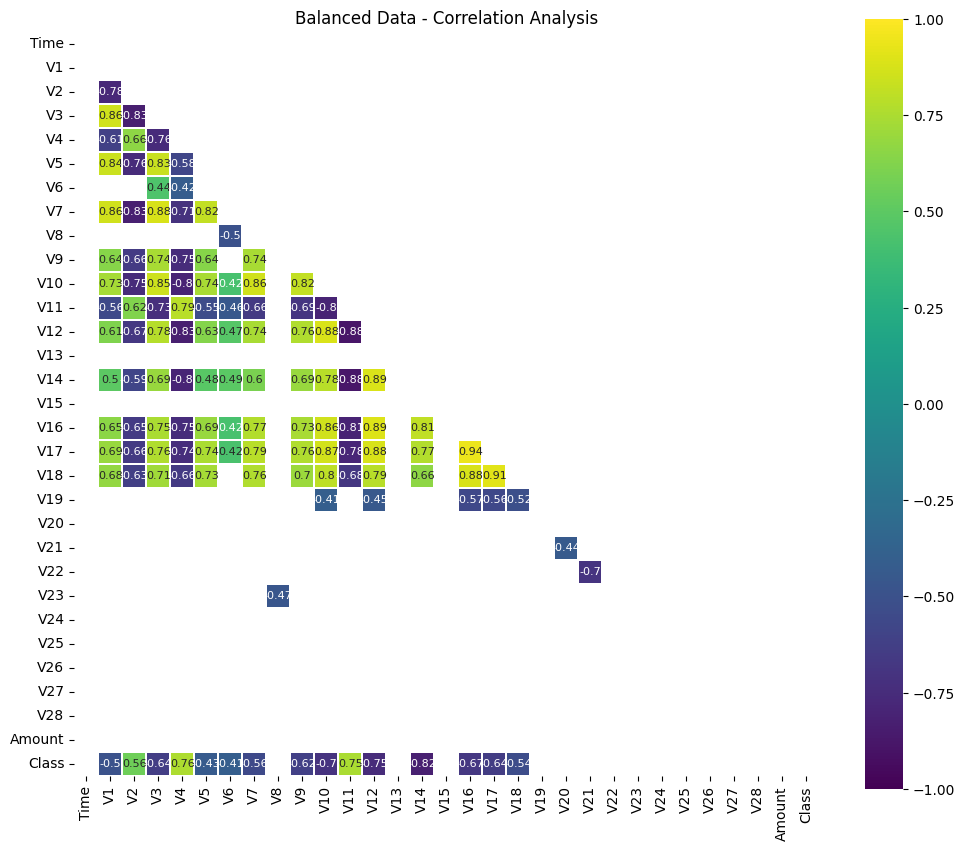

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming df is your DataFrame
corr = balanced_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
plt.title('Balanced Data - Correlation Analysis')
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, mask=mask)

plt.show()

In [11]:
import pandas as pd

# Assuming df is your DataFrame
correlation_matrix = balanced_df.corr()

# Extract features with correlation more than 0.3 to 'Class'
correlated_features = correlation_matrix[abs(correlation_matrix['Class']) > 0.4].index.tolist()

print(correlated_features)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Class']


# Mutual Information Classifier

In [12]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Define features and target variable
X = balanced_df[correlated_features[:-1]]
y = balanced_df[correlated_features[-1]]

# Calculate mutual information between features and target
mutual_info = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame to display mutual information
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
feature_importance_df = feature_importance_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Display the result
print("==================================")
print("Mutual Information:")
print(feature_importance_df)
print("==================================")
# Most important feature
most_important_feature = feature_importance_df.iloc[0]['Feature']
print(f"\nThe most important feature is: {most_important_feature}")

Mutual Information:
   Feature  Mutual Information
0      V14            0.505474
1      V10            0.451579
2      V12            0.443511
3      V17            0.428152
4      V11            0.402767
5       V4            0.402349
6       V3            0.371471
7      V16            0.341128
8       V7            0.309476
9       V2            0.283084
10      V9            0.272357
11     V18            0.212543
12      V1            0.210118
13      V6            0.183001
14      V5            0.161009

The most important feature is: V14


In [13]:
# Calculate the average of Mutual Information
average_mi = feature_importance_df['Mutual Information'].mean()

# Select features with Mutual Information greater than the average
selected_features = feature_importance_df[feature_importance_df['Mutual Information'] > average_mi]
selected_features

,Feature,Mutual Information
0,V14,0.505474
1,V10,0.451579
2,V12,0.443511
3,V17,0.428152
4,V11,0.402767
5,V4,0.402349
6,V3,0.371471
7,V16,0.341128


In [22]:
average_mi

0.33186791274776983

In [14]:
important_features = selected_features['Feature'].array.tolist()
important_features

['V14', 'V10', 'V12', 'V17', 'V11', 'V4', 'V3', 'V16']

# XGB Classifier

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [16]:
X = balanced_df[important_features]
y = balanced_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the XGBRegressor model
model_xgb = XGBClassifier()

# Fit the model
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_xgb.predict(X_test)

# Display classification report
print("Classification Report of XGB Classifier:")
print(classification_report(y_test, y_pred))

Classification Report of XGB Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17055
           1       0.99      0.99      0.99      8533

    accuracy                           1.00     25588
   macro avg       1.00      1.00      1.00     25588
weighted avg       1.00      1.00      1.00     25588

